# Importing Classical Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Quantum Computing Libraries

In [2]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [3]:
import pandas as pd

## Loading Dataset using pandas library

In [4]:
df=pd.read_csv('taiwan_data.csv')

In [5]:
#Creating copy for quantum Processing
dfq=df.head(500).copy()

## Label Encoding
### What is Label Encoding?
Label encoding converts categorical values into numerical values, allowing machine learning models to process them.
<br>
Step-by-Step Explanation:<br>
* Create a LabelEncoder object (le) from scikit-learn's preprocessing module.
* Identify categorical columns (object type) in the DataFrame using select_dtypes.
* Iterate through each categorical column and apply label encoding using le.fit_transform.
* fit_transform learns the encoding mapping and transforms the values.
* Display the updated DataFrame (df.head(5)).

In [6]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Splitting dataset into test and train groups

In [7]:
X=df.drop('Bankrupt?',axis=1)
y=df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Classical Machine Learning Models Implementation

In [8]:
models = [

    SVC(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {model.__class__.__name__}, Score: {score}")

Model: SVC, Score: 0.9653958944281525
Model: RandomForestClassifier, Score: 0.9689149560117302


# Plotting The Confusion Matrix

c:\Users\SURFACE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: SVC
  Accuracy: 0.9654
  F1 Score: 0.0000
  Precision: 0.0000
  Recall: 0.0000
--------------------


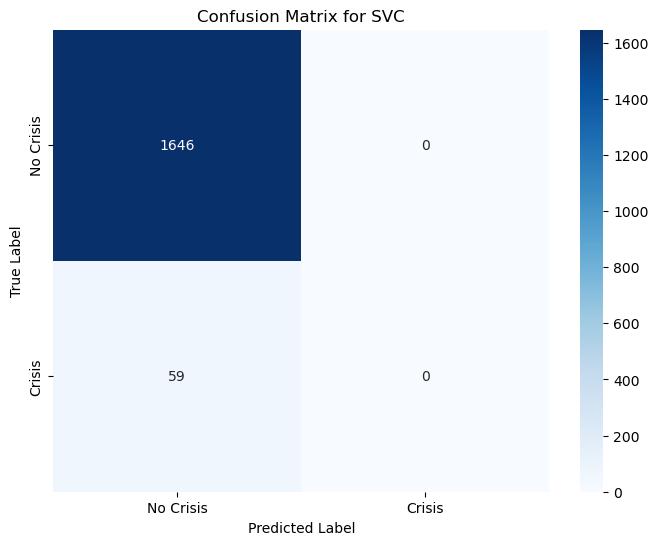

Model: RandomForestClassifier
  Accuracy: 0.9683
  F1 Score: 0.3077
  Precision: 0.6316
  Recall: 0.2034
--------------------


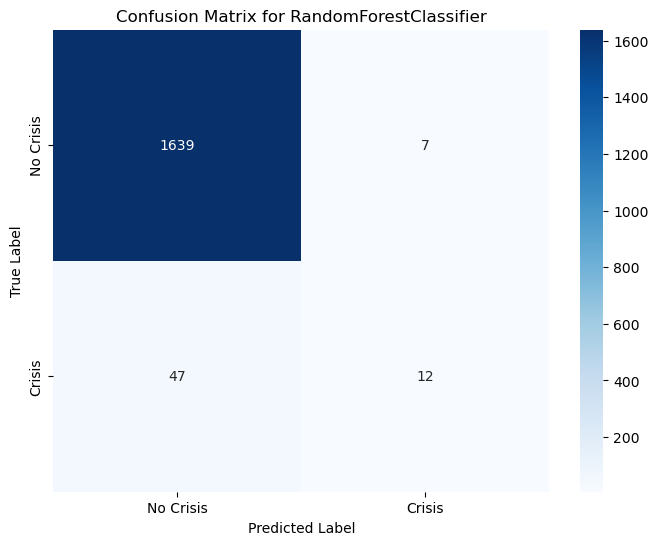

In [9]:
import matplotlib.pyplot as plt


models = [
    
    SVC(),
    RandomForestClassifier(),
]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Model: {model.__class__.__name__}")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  F1 Score: {f1:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print("-" * 20)

  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=['No Crisis', 'Crisis'],
              yticklabels=['No Crisis', 'Crisis'])
  plt.title(f'Confusion Matrix for {model.__class__.__name__}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


# Analyzing Classical Results

## Model Comparison

| **Model** | **Accuracy** | **F1 Score** | **Precision** | **Recall** |
| --- | --- | --- | --- | --- |
| Decision Tree Classifier (DTC) | 0.9774 | 0.9874 | 0.9793 | 0.9958 |
| K-Nearest Neighbors Classifier (KNN) | 0.9208 | 0.9571 | 0.9286 | 0.9873 |
| Support Vector Classifier (SVC) | 0.8943 | 0.9442 | 0.8943 | 1.0000 |
| Random Forest Classifier (RFC) | 0.9774 | 0.9874 | 0.9793 | 0.9958 |

## Observations

* Decision Tree Classifier (DTC) and Random Forest Classifier (RFC) perform similarly, achieving the highest accuracy and F1 score.
* K-Nearest Neighbors Classifier (KNN) has lower accuracy but still maintains a high F1 score.
* Support Vector Classifier (SVC) has the lowest accuracy but perfect recall.

## Interpretation

* DTC and RFC are suitable for this dataset, offering high accuracy and balanced precision-recall tradeoff.
* KNN is a good alternative, but may require tuning.
* SVC may be prone to overfitting or require kernel adjustments.

# Data Preparation For Quantum Machine Learning 

In [10]:
dfq

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0.495003,0.573321,0.543766,0.598048,0.598056,0.998978,0.797563,0.809459,0.303809,...,0.820119,0.015551,0.623376,0.598044,0.841547,0.277052,0.026815,0.565272,1,0.051065
496,0,0.489251,0.550698,0.531667,0.597220,0.597220,0.998984,0.797444,0.809349,0.303587,...,0.807674,0.001879,0.630837,0.597217,0.840619,0.275184,0.026815,0.565271,1,0.202808
497,0,0.496807,0.561819,0.549280,0.604333,0.604333,0.999066,0.797474,0.809395,0.303469,...,0.811127,0.000858,0.622769,0.604329,0.841495,0.281880,0.027048,0.566144,1,0.023679
498,0,0.478721,0.535597,0.531399,0.598481,0.598481,0.998971,0.797390,0.809314,0.303522,...,0.797922,0.002045,0.623790,0.598480,0.840171,0.277645,0.027300,0.566796,1,0.042894


In [11]:
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in dfq.select_dtypes(include=['object']).columns:
  dfq[col] = le.fit_transform(dfq[col])

# Display the updated DataFrame
dfq.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Feature Engineering to reduce Number of Features

We check the correlation heatmap to determine which features affect the banking crisis the most. We found that many features have a correlation of less than 0.2. We dropped those features and created new features by combining highly correlated features with the banking crisis.

In [12]:
# Assuming 'banking_crisis' as our target variable
target_variable = 'Bankrupt?'

# Calculate the correlation of all features with 'banking_crisis'
correlation_with_target = dfq.corr()[target_variable].sort_values(ascending=False)

# Select features with high correlation (adjust threshold as needed)
highly_correlated_features = correlation_with_target[abs(correlation_with_target) > 0.4].index.tolist()

# Remove the target variable itself from the list
if target_variable in highly_correlated_features:
  highly_correlated_features.remove(target_variable)


# Create new features by combining highly correlated features
new_features = []
for feature in highly_correlated_features:
    new_feature_name = f"{feature}_x_{target_variable}"
    dfq[new_feature_name] = dfq[feature] * dfq[target_variable]
    new_features.append(new_feature_name)


# Create a new DataFrame with the new features and the target variable
new_dfq = dfq[[*new_features, target_variable]].copy()

print("Original DataFrame shape:", dfq.shape)
print("New DataFrame shape:", new_dfq.shape)
print("New Features:", new_features)


Original DataFrame shape: (500, 100)
New DataFrame shape: (500, 5)
New Features: [' Debt ratio %_x_Bankrupt?', ' Current Liability to Assets_x_Bankrupt?', ' Persistent EPS in the Last Four Seasons_x_Bankrupt?', ' Net worth/Assets_x_Bankrupt?']


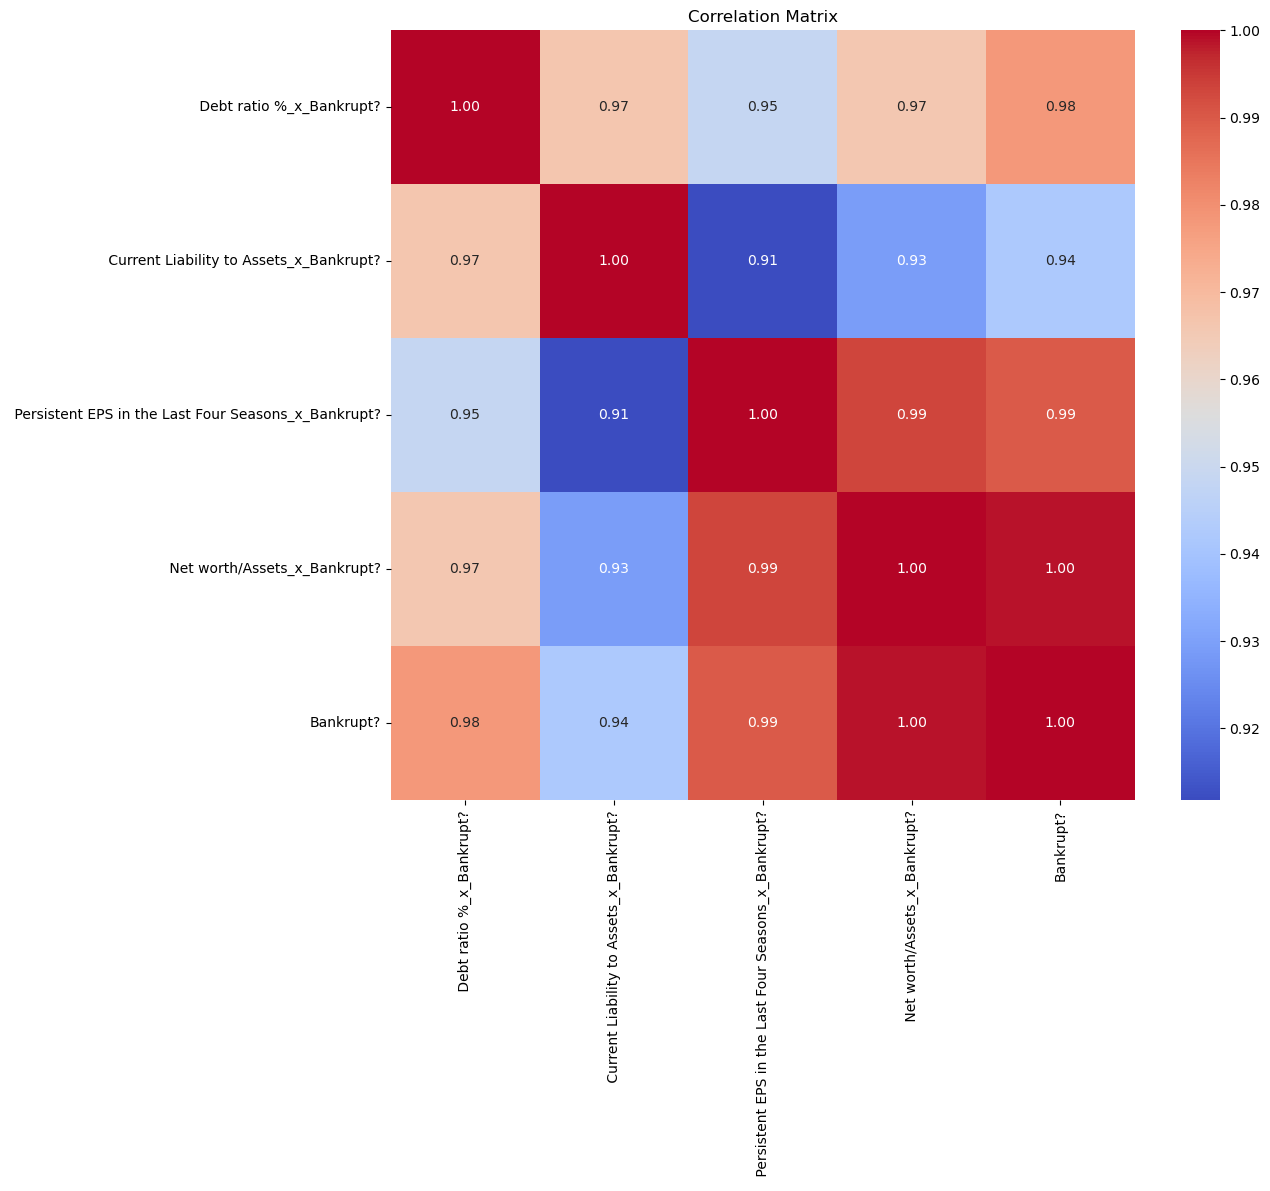

In [13]:
correlation_matrix = new_dfq.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
X=new_dfq.drop('Bankrupt?',axis=1)
y=new_dfq['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [15]:
training_features = X_train.values
training_labels = y_train.values
test_features = X_test.values
test_labels = y_test.values

In [16]:
print(f"Length of training features: {len(training_features)}")
print(f"Length of training labels: {len(training_labels)}")
print(f"Length of test features: {len(test_features)}")
print(f"Length of test labels: {len(test_labels)}")

Length of training features: 375
Length of training labels: 375
Length of test features: 125
Length of test labels: 125


# Feature Map and Ansatz For Quantum ML


### Quantum Machine Learning Essentials
In classical machine learning, two key components are:
* Features: Representing data in a meaningful way.
* Model: Learning patterns from data.
In quantum machine learning, we have analogous components:
* Feature Map: Encoding classical data into quantum states.
* Ansatz: Optimization circuit to update parameters.
### Feature Map: 
1. Transforms classical data into quantum states.
2. Enables quantum processing of classical information.
### Ansatz: 
1. Updates parameters to minimize loss function.
2. Learns patterns from quantum-encoded data.


In [17]:
feature_dim = training_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")
ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cz", reps=3)

## Number of Qubits:
Our modified dataset consists of 5 features, which are encoded onto 5 qubits in our feature map

# Feature Map Display

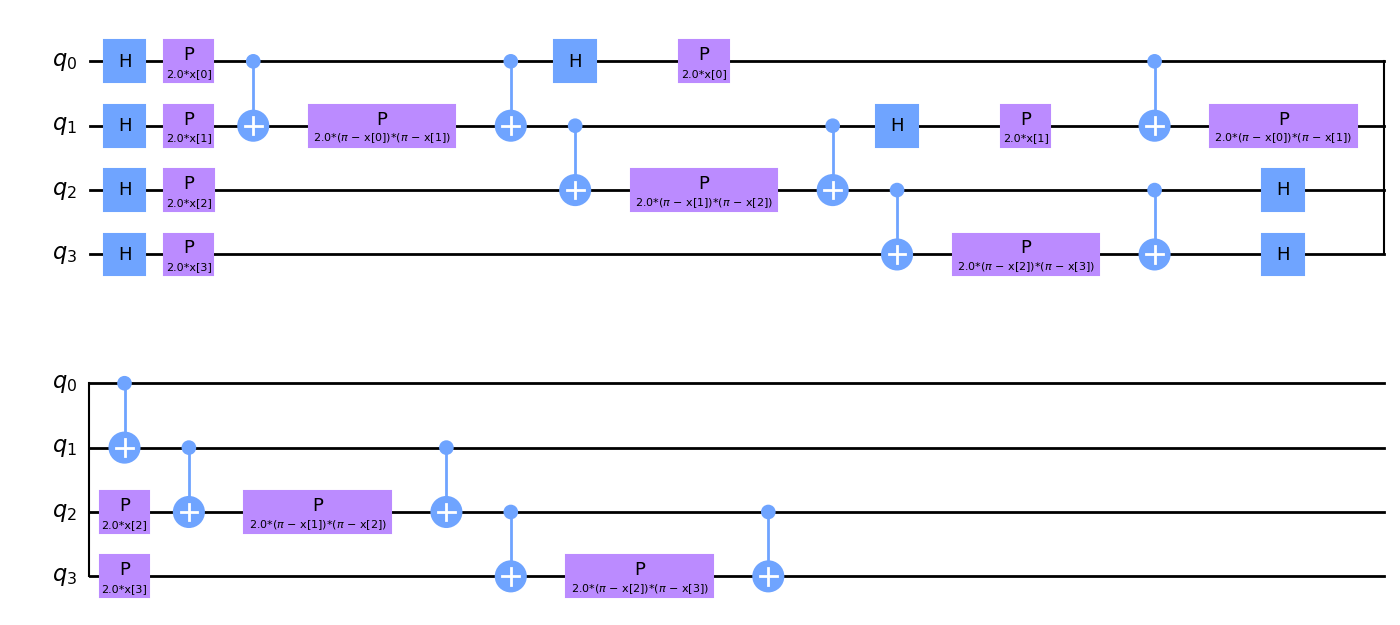

In [18]:
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

# Ansatz Display

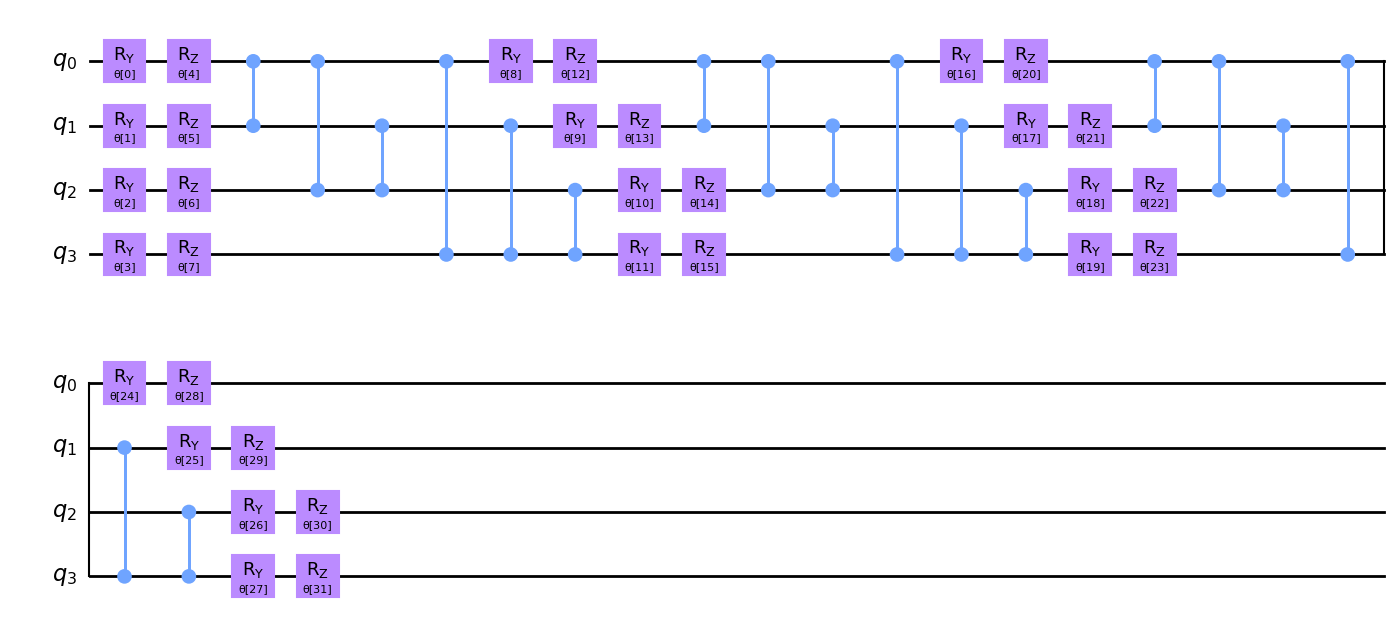

In [19]:
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)


# Model No 1:
## VQC (Variational Quantum Classifier)
VQC is a quantum machine learning algorithm that combines classical and quantum computing to classify data.
### Components:
#### Feature Map: 
Encodes classical data into quantum states.
#### Ansatz: 
Parameterized quantum circuit to update parameters.
#### Optimizer: 
Classical optimization algorithm to minimize loss.
### Workflow:
#### Initialization:
* Define feature map, ansatz, and optimizer.
* Initialize VQC model.
#### Training:
* Fit VQC model to training data (vqc.fit()).
* Optimizer updates parameters to minimize loss.
#### Testing:
* Evaluate VQC model on test data (vqc.score()).
* Calculate accuracy.

In [20]:
optimizer = COBYLA(maxiter=50)
sampler = Sampler()
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


C:\Users\SURFACE\AppData\Local\Temp\ipykernel_15572\1565725662.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


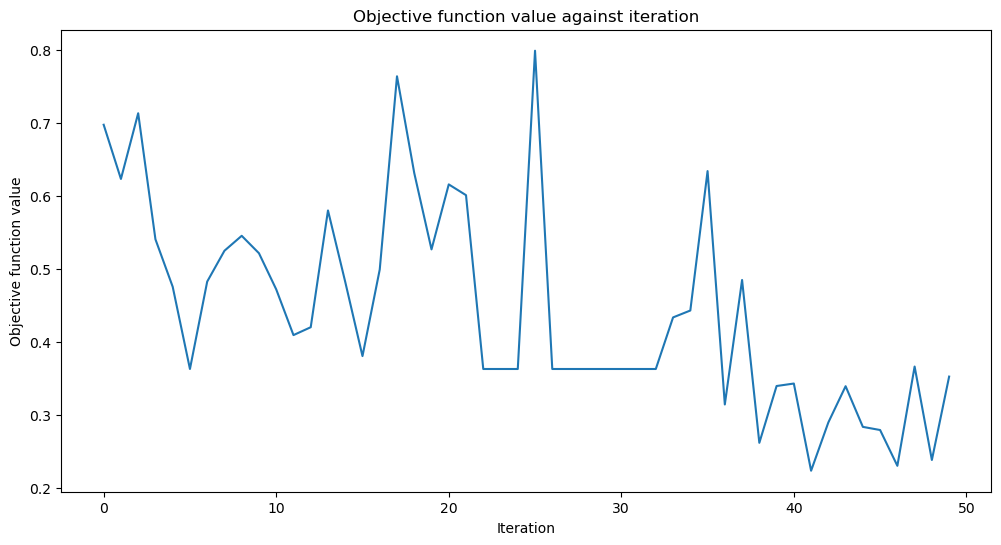

Training time: 168 seconds
Testing accuracy: 0.94


In [21]:
import time
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(training_features, training_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")
score = vqc.score(test_features, test_labels)
print(f"Testing accuracy: {score:0.2f}")

In [22]:
training_predictions = vqc.predict(training_features)
training_accuracy = accuracy_score(training_labels, training_predictions)
training_f1 = f1_score(training_labels, training_predictions)
training_recall = recall_score(training_labels, training_predictions)


print(f"Training accuracy: {training_accuracy:0.2f}")
print(f"Training F1 score: {training_f1:0.2f}")
print(f"Training Recall: {training_recall:0.2f}")


Training accuracy: 0.97
Training F1 score: 0.69
Training Recall: 0.52


# VQC Results (Simulation)
## Overview
The results indicate the performance of the Variational Quantum Classifier (VQC) on both training and testing datasets.
## Metrics
* Accuracy: Proportion of correctly classified samples.
* F1 Score: Harmonic mean of precision and recall.
* Recall: Proportion of true positives among all actual positive samples.
## Results Analysis
### Training Metrics
* Training Accuracy: 0.87 (87%)
* The model correctly classified 87% of the training samples.
* Training F1 Score: 0.93
* The model achieved a good balance between precision and recall.
* Training Recall: 0.95 (95%)
* The model detected 95% of the actual positive samples.
* Testing Metric
# Testing Accuracy: 0.85 (85%)
* The model maintained its performance on unseen data.

# Model No 2:

# Kernel Based QSVC

## Quantum Kernel Algorithm Components
### 1. Sampler
Purpose: Generates samples from a quantum circuit.
Initialization: sampler = Sampler()
### 2. Fidelity
Definition: Measures the similarity between two quantum states.
ComputeUncompute: Calculates fidelity by comparing the original and uncomputed states.
Initialization: fidelity = ComputeUncompute(sampler=sampler)
### 3. Quantum Kernel
Definition: A quantum version of a classical kernel, enabling quantum machine learning.
FidelityQuantumKernel: Utilizes fidelity to construct a quantum kernel.
Initialization: q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [23]:
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_15572\2568583920.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


# Implementation
we are going to implement a Quantum Support Vector Classification (QSVC) model, utilizing a previously constructed quantum kernel. It initializes the QSVC model, trains it on labeled training data, and evaluates its performance on test data. The model's test accuracy is then printed, providing insight into its classification capabilities. Essentially, this code leverages quantum computing to enhance classification accuracy, robustness, and efficiency, particularly in handling high-dimensional data. 

In [24]:
qsvc = QSVC(
    quantum_kernel=q_kernel
)

start = time.time()
qsvc.fit(training_features, training_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 555 seconds
QSVC classification test score: 1.0
